# Определение стоимости автомобилей

### Импорт библиотек и настройки

In [48]:
# data preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
import time

# data visualization
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Algorithms
from sklearn.linear_model import SGDRegressor, RidgeCV, ElasticNetCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from tpot import TPOTRegressor

# отключаем предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

## Подготовка данных
### Описание данных
**Признаки**
- `DateCrawled` — дата скачивания анкеты из базы
- `VehicleType` — тип автомобильного кузова
- `RegistrationYear` — год регистрации автомобиля
- `Gearbox` — тип коробки передач
- `Power` — мощность (л. с.)
- `Model` — модель автомобиля
- `Kilometer` — пробег (км)
- `RegistrationMonth` — месяц регистрации автомобиля
- `FuelType` — тип топлива
- `Brand` — марка автомобиля
- `NotRepaired` — была машина в ремонте или нет
- `DateCreated` — дата создания анкеты
- `NumberOfPictures` — количество фотографий автомобиля
- `PostalCode` — почтовый индекс владельца анкеты (пользователя)
- `LastSeen` — дата последней активности пользователя

**Целевой признак**
- `Price` — цена (евро)

In [49]:
data = pd.read_csv('./datasets/autos.csv')
display(data)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


### Удаление лишних признаков
В наборе данных есть ряд признаков, которые не влияют на прогноз стоимости авто:
   - `DateCrawled` — дата скачивания анкеты из базы
   - `RegistrationMonth` — месяц регистрации автомобиля
   - `DateCreated` — дата создания анкеты
   - `NumberOfPictures` — количество фотографий автомобиля
   - `PostalCode` — почтовый индекс владельца анкеты (пользователя)
   - `LastSeen` — дата последней активности пользователя

In [50]:
data = data.drop(['DateCrawled', 'RegistrationMonth', 'DateCreated', 'LastSeen', 'PostalCode', 'NumberOfPictures'], axis=1)
display(data)

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
...,...,...,...,...,...,...,...,...,...,...
354364,0,NaN,2005,manual,0,colt,150000,petrol,mitsubishi,yes
354365,2200,NaN,2005,NaN,0,NaN,20000,NaN,sonstige_autos,NaN
354366,1199,convertible,2000,auto,101,fortwo,125000,petrol,smart,no
354367,9200,bus,1996,manual,102,transporter,150000,gasoline,volkswagen,no


### Изучение данных

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             354369 non-null  int64 
 1   VehicleType       316879 non-null  object
 2   RegistrationYear  354369 non-null  int64 
 3   Gearbox           334536 non-null  object
 4   Power             354369 non-null  int64 
 5   Model             334664 non-null  object
 6   Kilometer         354369 non-null  int64 
 7   FuelType          321474 non-null  object
 8   Brand             354369 non-null  object
 9   NotRepaired       283215 non-null  object
dtypes: int64(4), object(6)
memory usage: 27.0+ MB


Мы видим, что ряд категориальных признаков имеют пропущенные значения: `VehicleType`, `Gearbox`, `Model`, `FuelType`, `NotRepaired`

In [52]:
display(data.isna().sum())

Price                   0
VehicleType         37490
RegistrationYear        0
Gearbox             19833
Power                   0
Model               19705
Kilometer               0
FuelType            32895
Brand                   0
NotRepaired         71154
dtype: int64

In [53]:
# выделяем категориальные переменные в группу
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
# изучим статистику категориальных признаков
display(data[categorical_columns].describe())

,VehicleType,Gearbox,Model,FuelType,Brand,NotRepaired
count,316879,334536,334664,321474,354369,283215
unique,8,2,250,7,40,2
top,sedan,manual,golf,petrol,volkswagen,no
freq,91457,268251,29232,216352,77013,247161


In [54]:
data['FuelType'].value_counts()

petrol      216352
gasoline     98720
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: FuelType, dtype: int64

Некоторые категориии признака `FlueType` можно объединить:
   - `petrol`, `gasoline` - это один тип топлива - бензин
   - `lpg`, `cng` - это один тип топлива - газ

In [55]:
# объединяем категории
data.loc[data['FuelType'] == 'gasoline', 'FuelType'] = 'petrol'
data.loc[data['FuelType'] == 'lpg', 'FuelType'] = 'gas'
data.loc[data['FuelType'] == 'cng', 'FuelType'] = 'gas'

Мой "Боливар" не выдержит таких нагрузок, поэтому я удалю признак `Model`

In [56]:
data = data.drop('Model', axis=1)

In [57]:
# выделяем численные переменные в группу
numeric_columns = [c for c in data.columns if data[c].dtype.name == 'int64']
# изучим статистику численных признаков
display(data[numeric_columns].describe())

,Price,RegistrationYear,Power,Kilometer
count,354369.000000,354369.000000,354369.000000,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535
std,4514.158514,90.227958,189.850405,37905.341530
min,0.000000,1000.000000,0.000000,5000.000000
25%,1050.000000,1999.000000,69.000000,125000.000000
50%,2700.000000,2003.000000,105.000000,150000.000000
75%,6400.000000,2008.000000,143.000000,150000.000000
max,20000.000000,9999.000000,20000.000000,150000.000000


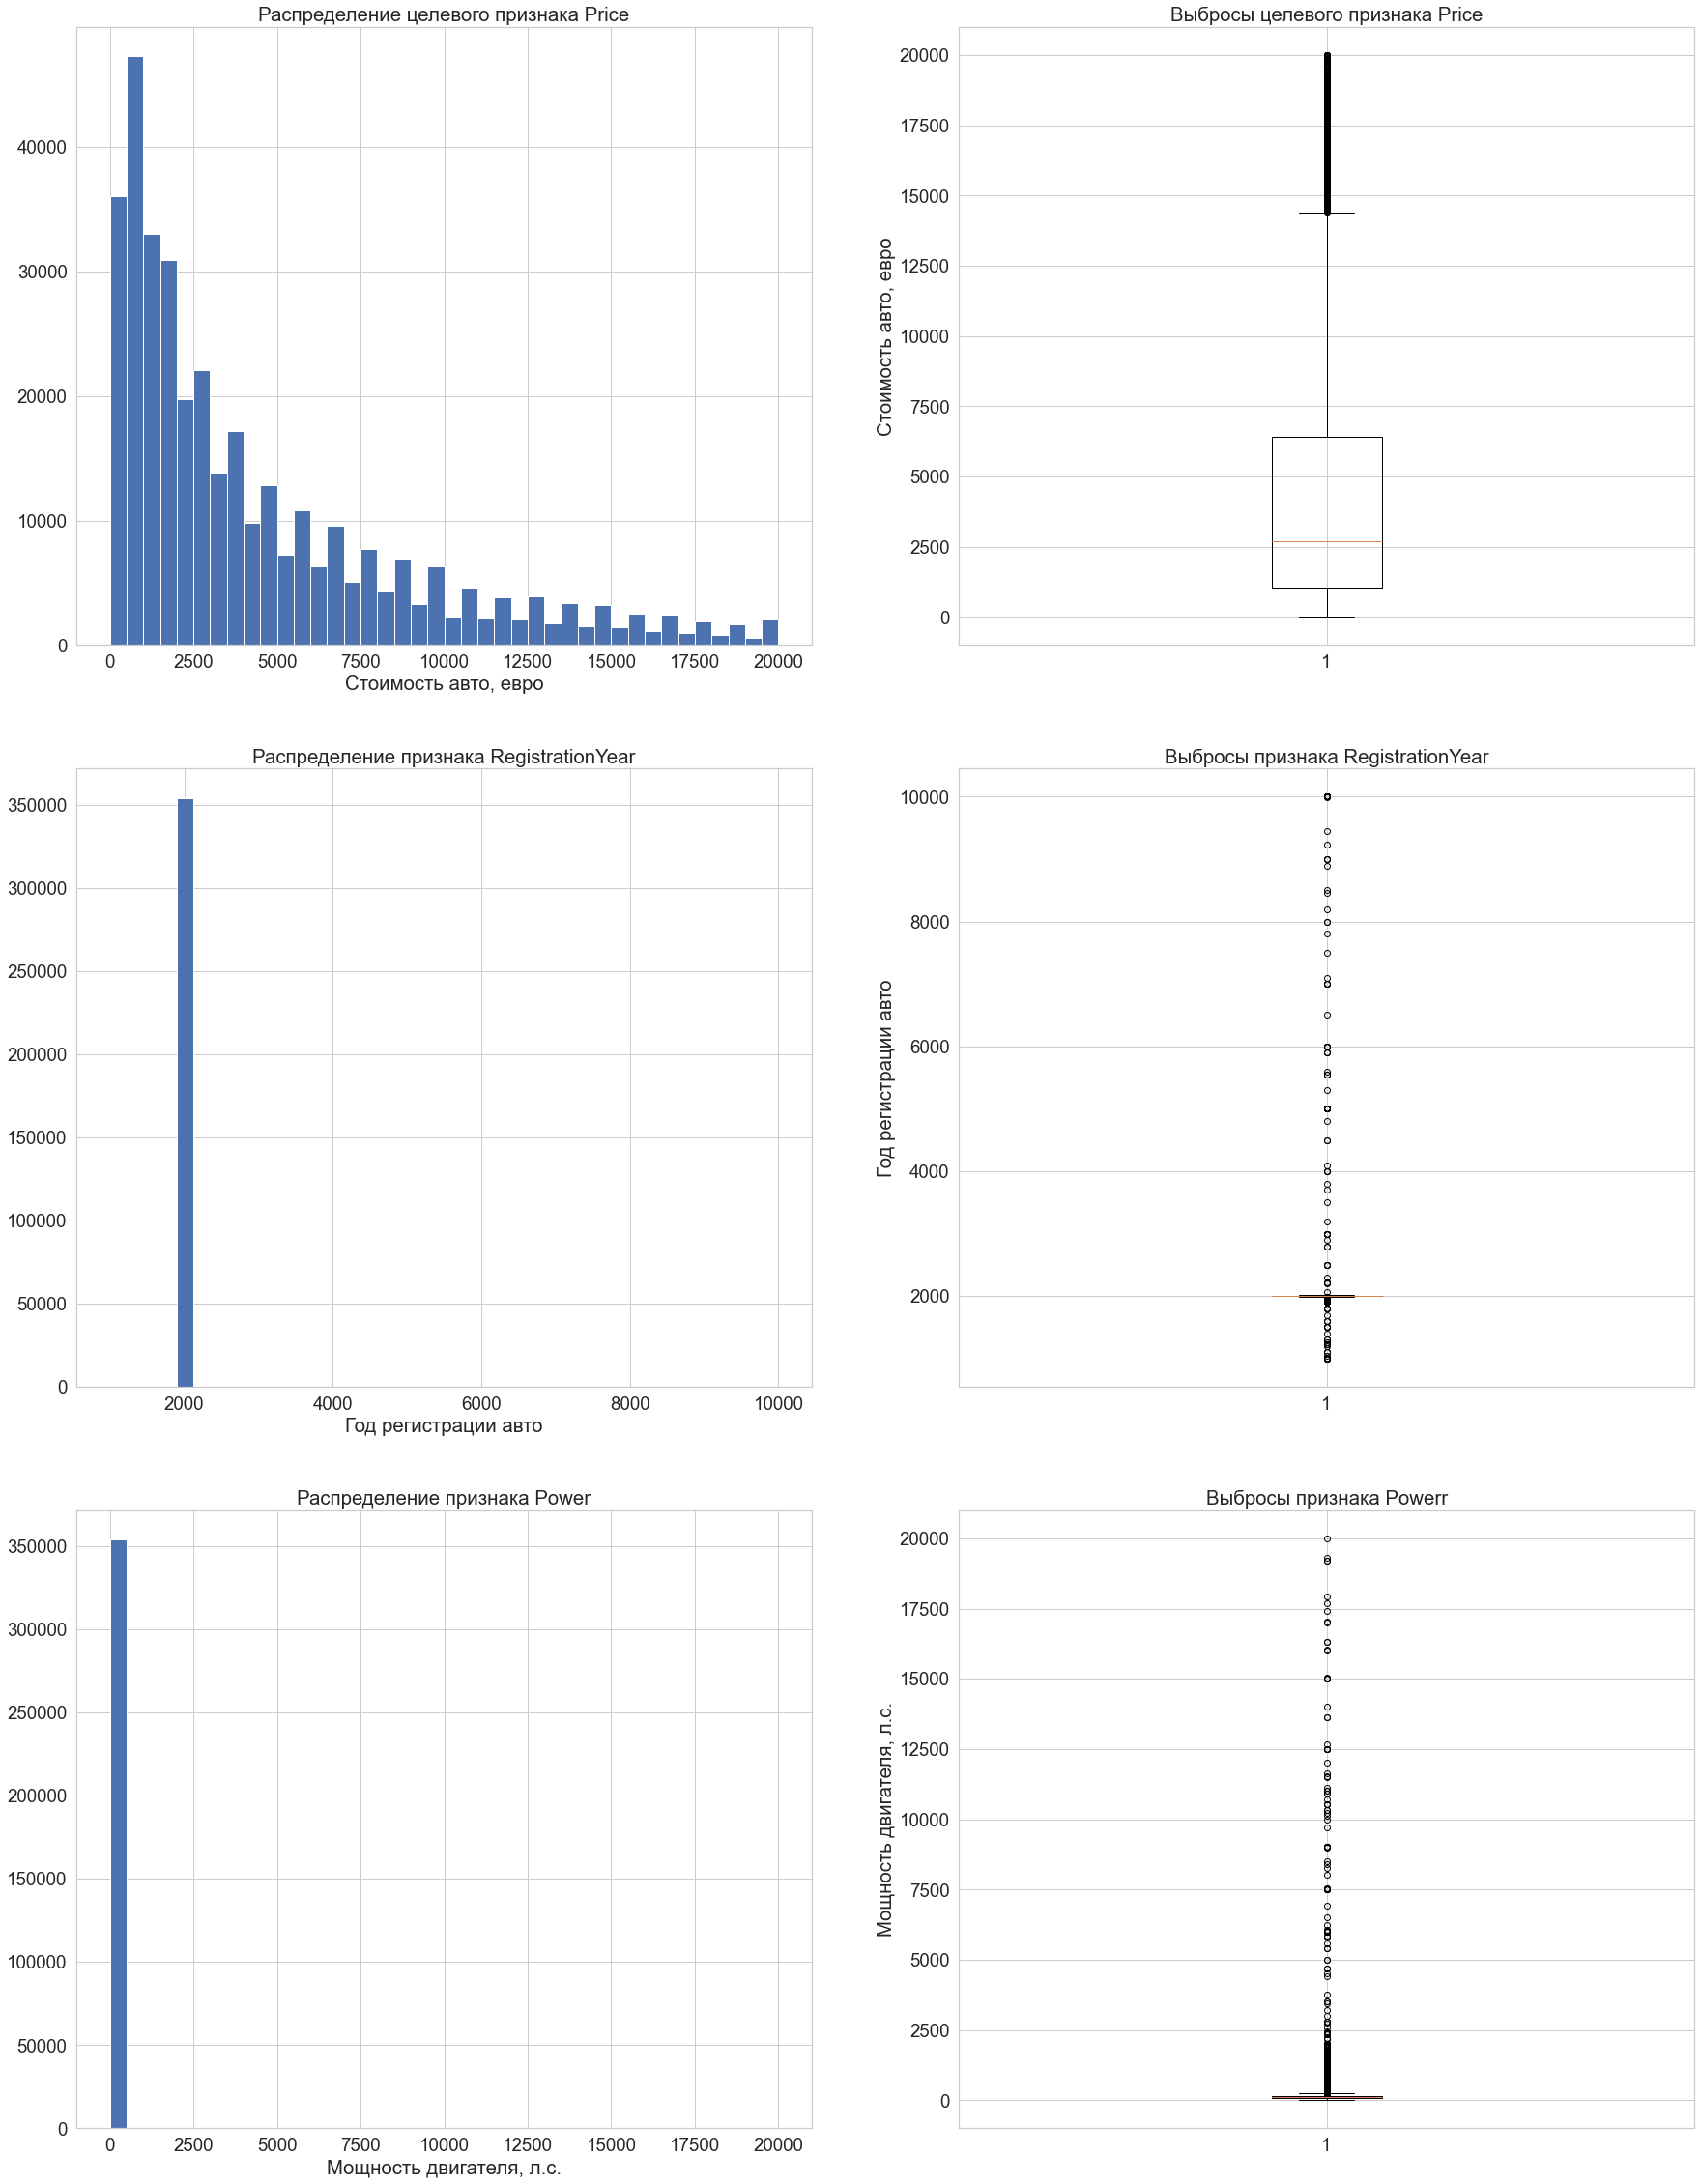

In [58]:
# выведим распределение численных признаков
fig,ax = plt.subplots(3,2,figsize = (30,40))

ax[0][0].hist(data['Price'],bins = 40)
ax[0][1].boxplot(data['Price'])
ax[0][0].set_xlabel('Стоимость авто, евро')
ax[0][1].set_ylabel('Стоимость авто, евро')
ax[0][0].set_title('Распределение целевого признака Price')
ax[0][1].set_title('Выбросы целевого признака Price')

ax[1][0].hist(data['RegistrationYear'],bins = 40)
ax[1][1].boxplot(data['RegistrationYear'])
ax[1][0].set_xlabel('Год регистрации авто')
ax[1][1].set_ylabel('Год регистрации авто')
ax[1][0].set_title('Распределение признака RegistrationYear')
ax[1][1].set_title('Выбросы признака RegistrationYear')

ax[2][0].hist(data['Power'],bins = 40)
ax[2][1].boxplot(data['Power'])
ax[2][0].set_xlabel('Мощность двигателя, л.с.')
ax[2][1].set_ylabel('Мощность двигателя, л.с.')
ax[2][0].set_title('Распределение признака Power')
ax[2][1].set_title('Выбросы признака Powerr')

plt.show()

Мы видим, что ряд численных признаков имеют аномальные значения:
   - `Price` имеет значение 0
   - `RegistrationYear` имеет минимальное значение 1000, максимальное значение 9999
   - `Power` имеет минимальное значение 0, максимальное значение 20000 л.с.

### Обработка пропусков в категориальных признаках

In [59]:
# выполним импутацию заменой пропусков на наиболее частые значения
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(data)
data = pd.DataFrame(imp.transform(data), columns=data.columns)
display(data.isna().sum())

Price               0
VehicleType         0
RegistrationYear    0
Gearbox             0
Power               0
Kilometer           0
FuelType            0
Brand               0
NotRepaired         0
dtype: int64

### Обработка аномальных значений в численных признаках

In [60]:
# выполним замену значений признака Price менее 500 на медианное значение
mediana_price = round(data['Price'].median())
data.loc[data['Price'] < 500, 'Price'] = mediana_price
# выполним замену аномальных значений признака RegistrationYear на пограничные значения
data.loc[data['RegistrationYear'] < 1999, 'RegistrationYear'] = 1999
data.loc[data['RegistrationYear'] > 2021, 'RegistrationYear'] = 2021
# выполним замену аномальных значений признака Power на пограничные значения
# верхняя граница - максимальная мощность, которую развивает автомобиль, равна 1600 л.с.
# нижняя граница - значение первого квартиля 25% - 69 л.с.
data.loc[data['Power'] < 69, 'Power'] = 69
data.loc[data['Power'] > 1600, 'Power'] = 1600
# выполним преобразование типов
data[['Price', 'RegistrationYear', 'Power', 'Kilometer']] = data[['Price',
                                                                  'RegistrationYear',
                                                                  'Power',
                                                                  'Kilometer']].apply(pd.to_numeric)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             354369 non-null  int64 
 1   VehicleType       354369 non-null  object
 2   RegistrationYear  354369 non-null  int64 
 3   Gearbox           354369 non-null  object
 4   Power             354369 non-null  int64 
 5   Kilometer         354369 non-null  int64 
 6   FuelType          354369 non-null  object
 7   Brand             354369 non-null  object
 8   NotRepaired       354369 non-null  object
dtypes: int64(4), object(5)
memory usage: 24.3+ MB


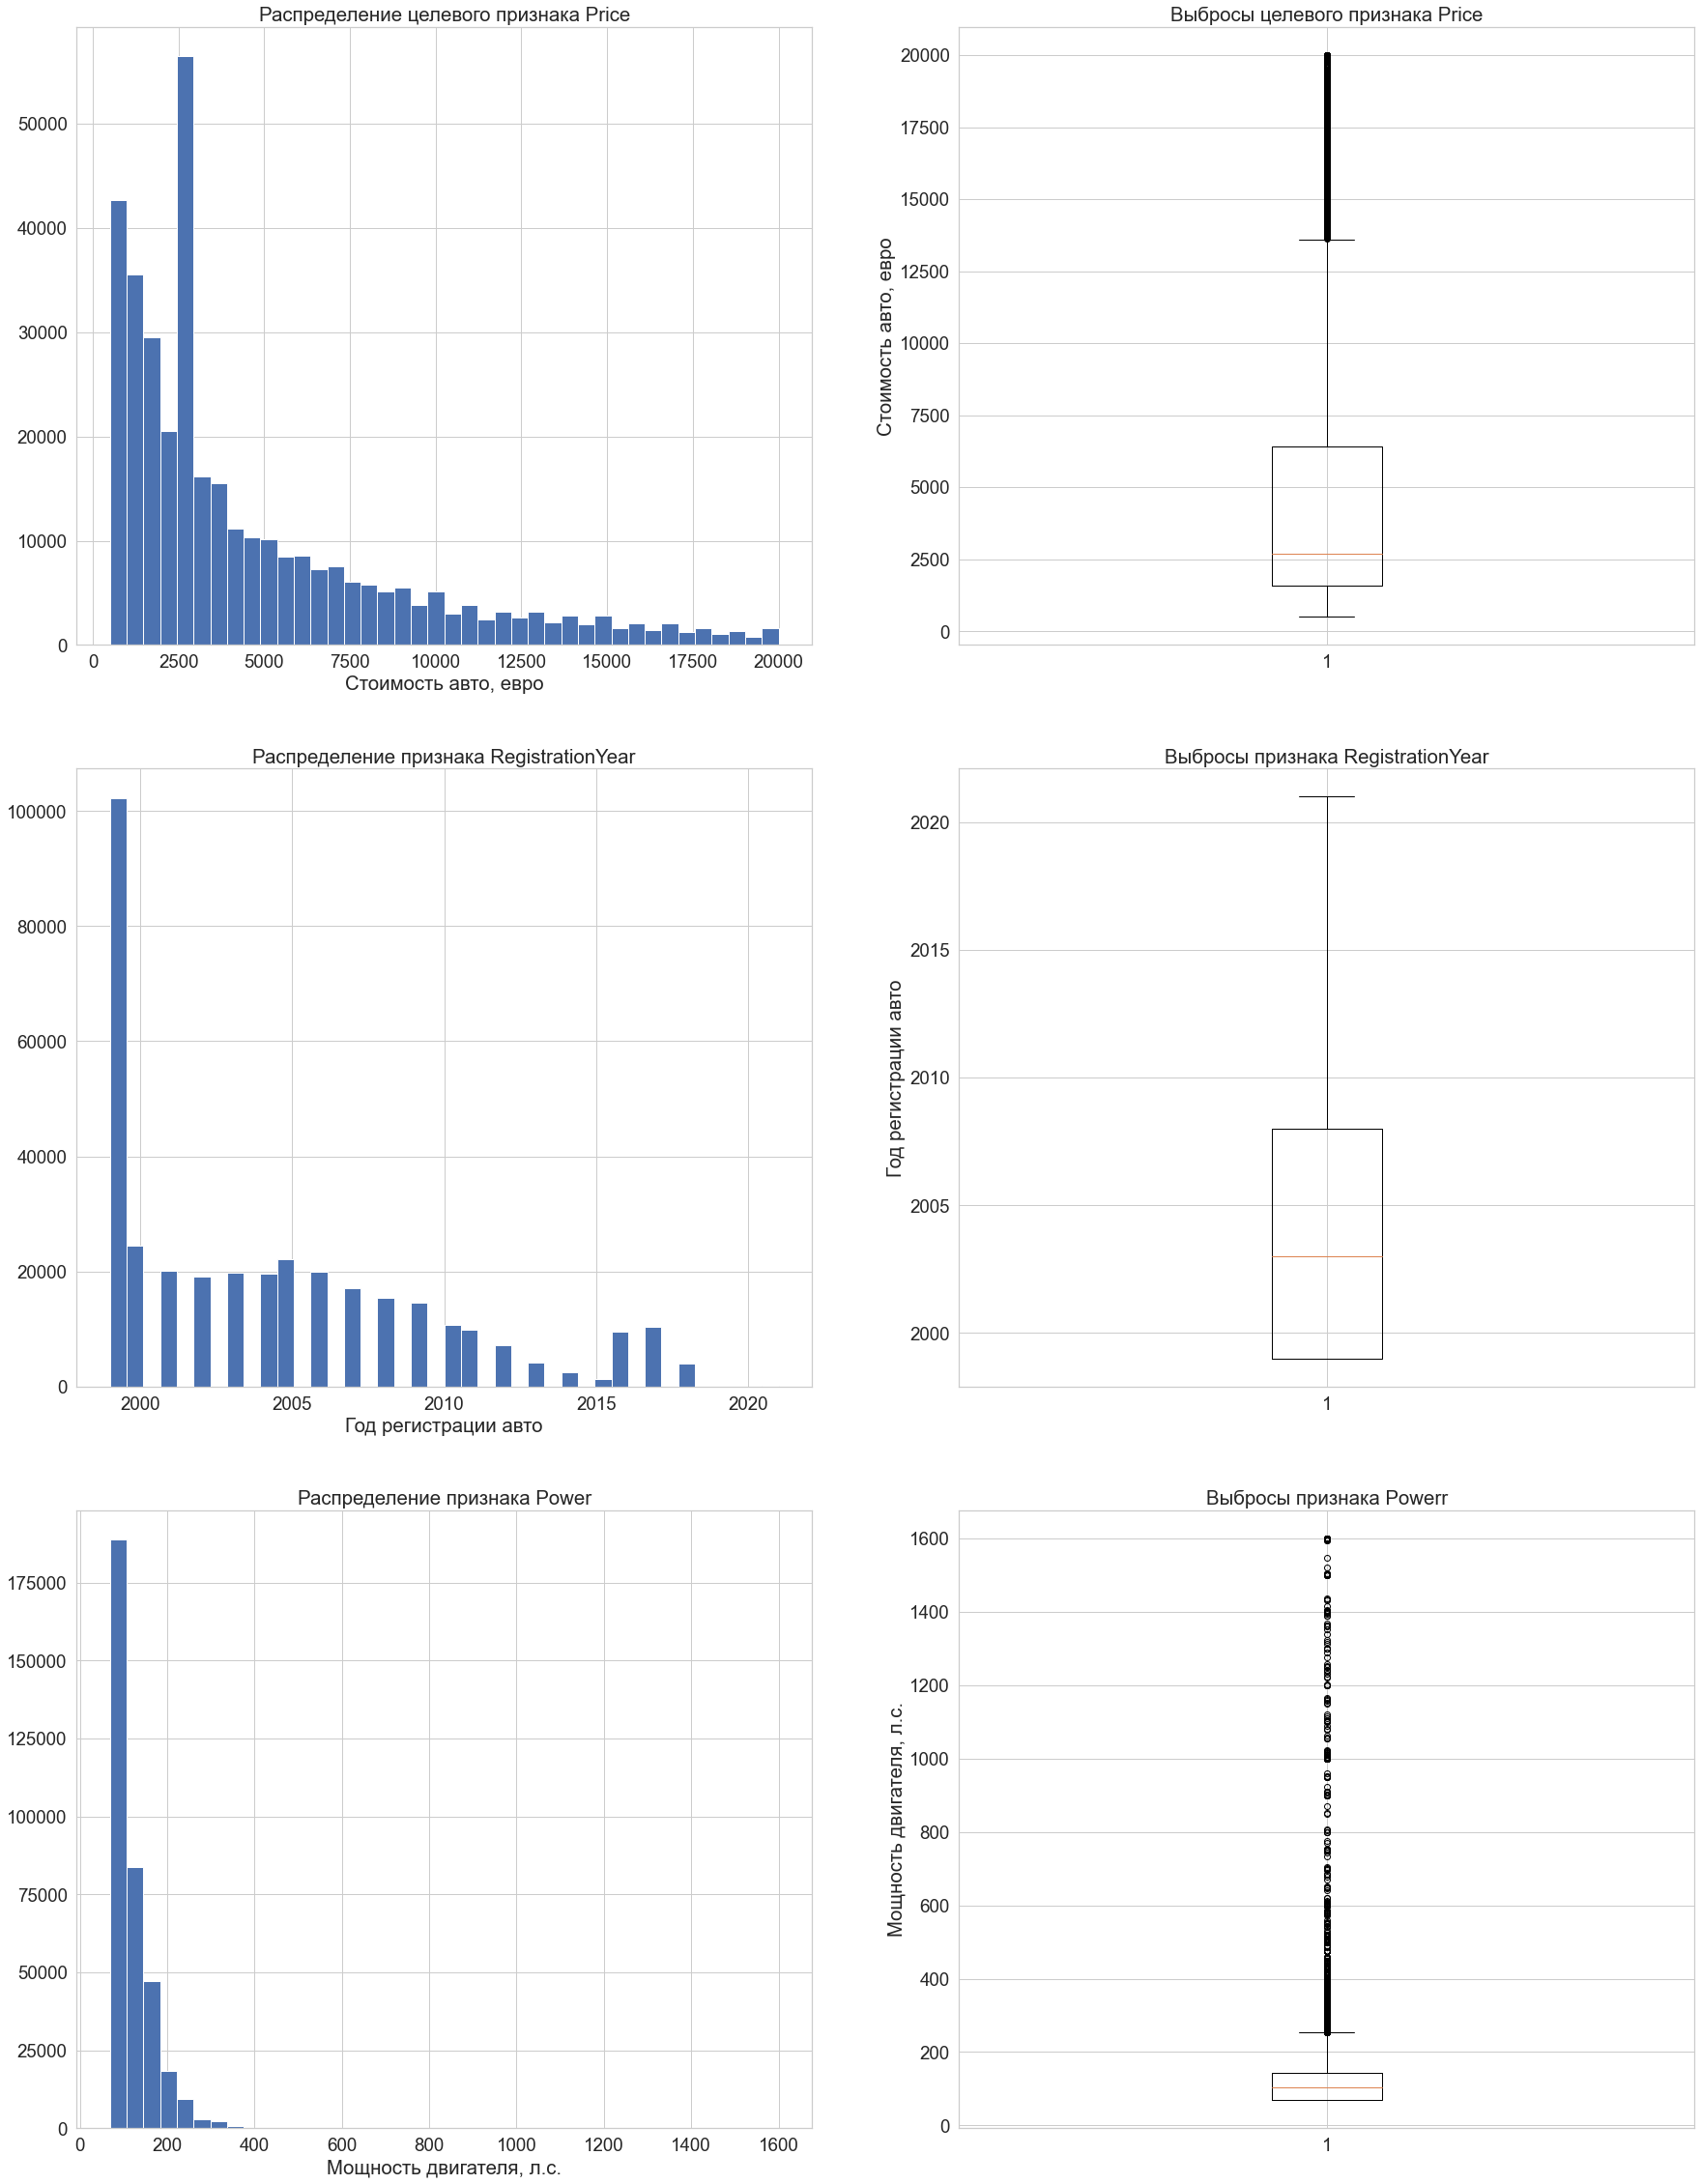

In [61]:
# выведим распределение численных признаков после обработки аномальных значений
fig,ax = plt.subplots(3,2,figsize = (30,40))

ax[0][0].hist(data['Price'],bins = 40)
ax[0][1].boxplot(data['Price'])
ax[0][0].set_xlabel('Стоимость авто, евро')
ax[0][1].set_ylabel('Стоимость авто, евро')
ax[0][0].set_title('Распределение целевого признака Price')
ax[0][1].set_title('Выбросы целевого признака Price')

ax[1][0].hist(data['RegistrationYear'],bins = 40)
ax[1][1].boxplot(data['RegistrationYear'])
ax[1][0].set_xlabel('Год регистрации авто')
ax[1][1].set_ylabel('Год регистрации авто')
ax[1][0].set_title('Распределение признака RegistrationYear')
ax[1][1].set_title('Выбросы признака RegistrationYear')

ax[2][0].hist(data['Power'],bins = 40)
ax[2][1].boxplot(data['Power'])
ax[2][0].set_xlabel('Мощность двигателя, л.с.')
ax[2][1].set_ylabel('Мощность двигателя, л.с.')
ax[2][0].set_title('Распределение признака Power')
ax[2][1].set_title('Выбросы признака Powerr')

plt.show()

### Дамми кодирование категориальных признаков

In [62]:
data_dammies = pd.get_dummies(data, columns=['VehicleType', 'Gearbox', 'Brand', 'FuelType', 'NotRepaired'],
                           drop_first=True)
display(data_dammies.head(3))

,Price,RegistrationYear,Power,Kilometer,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,...,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,FuelType_gas,FuelType_hybrid,FuelType_other,FuelType_petrol,NotRepaired_yes
0,2700,1999,69,150000,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,18300,2011,190,125000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,9800,2004,163,125000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


### Выделение признаков и целевой метки

In [63]:
features = data_dammies.drop('Price', axis=1)
target = data_dammies['Price']

### Разделение данных на тренировочную и тестовую выборки

In [64]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=12345)
print('Размер обучающей выборки', X_train.shape)
print('Размер тестовой выборки', X_test.shape)

Размер обучающей выборки (248058, 55)
Размер тестовой выборки (106311, 55)


### Масштабирование данных

In [65]:
sc = StandardScaler()
# вычислим параметры μ (эмпирическое среднее) и σ (стандартное отклонение) для каждой размерности признаков из тренировочных данных
sc.fit(X_train)
# стандартизируем данные, используя для этого расчетные параметры μ и σ.
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Вывод
В ходе этапа подгтовки данных мы выполнили следущие действия:
   1. Изучили данные, выявили факты аномальных значений в численных признаках и пропуски в категориальных признаках.
   2. Обработали аномальные значения, обозначив разумные границы этих значений.
   3. Заменили нулевые значения целевого признака на медианное значение, учитывая характер распределения этого
    признака.
   4. Обработали пропуски импутацией значениями с наибольшей частотой.
   5. Удалили признаки, явно не оказывающие влияние на предсказание стомости автомобиля.
   6. Удалили признак `Model`, имеющий число уникальных значений = 250, который при дамми кодировании значительно
    увеличивает размерность пространства признаков, усложняя нашу будущую модель.
   7. Выполнили дамми кодирование категориальных признаков.
   8. Выполнили выделение признаков и целевой метки.
   9. Выполнили масштабирование данных.

## Обучение моделей
### Выбор важных признаков


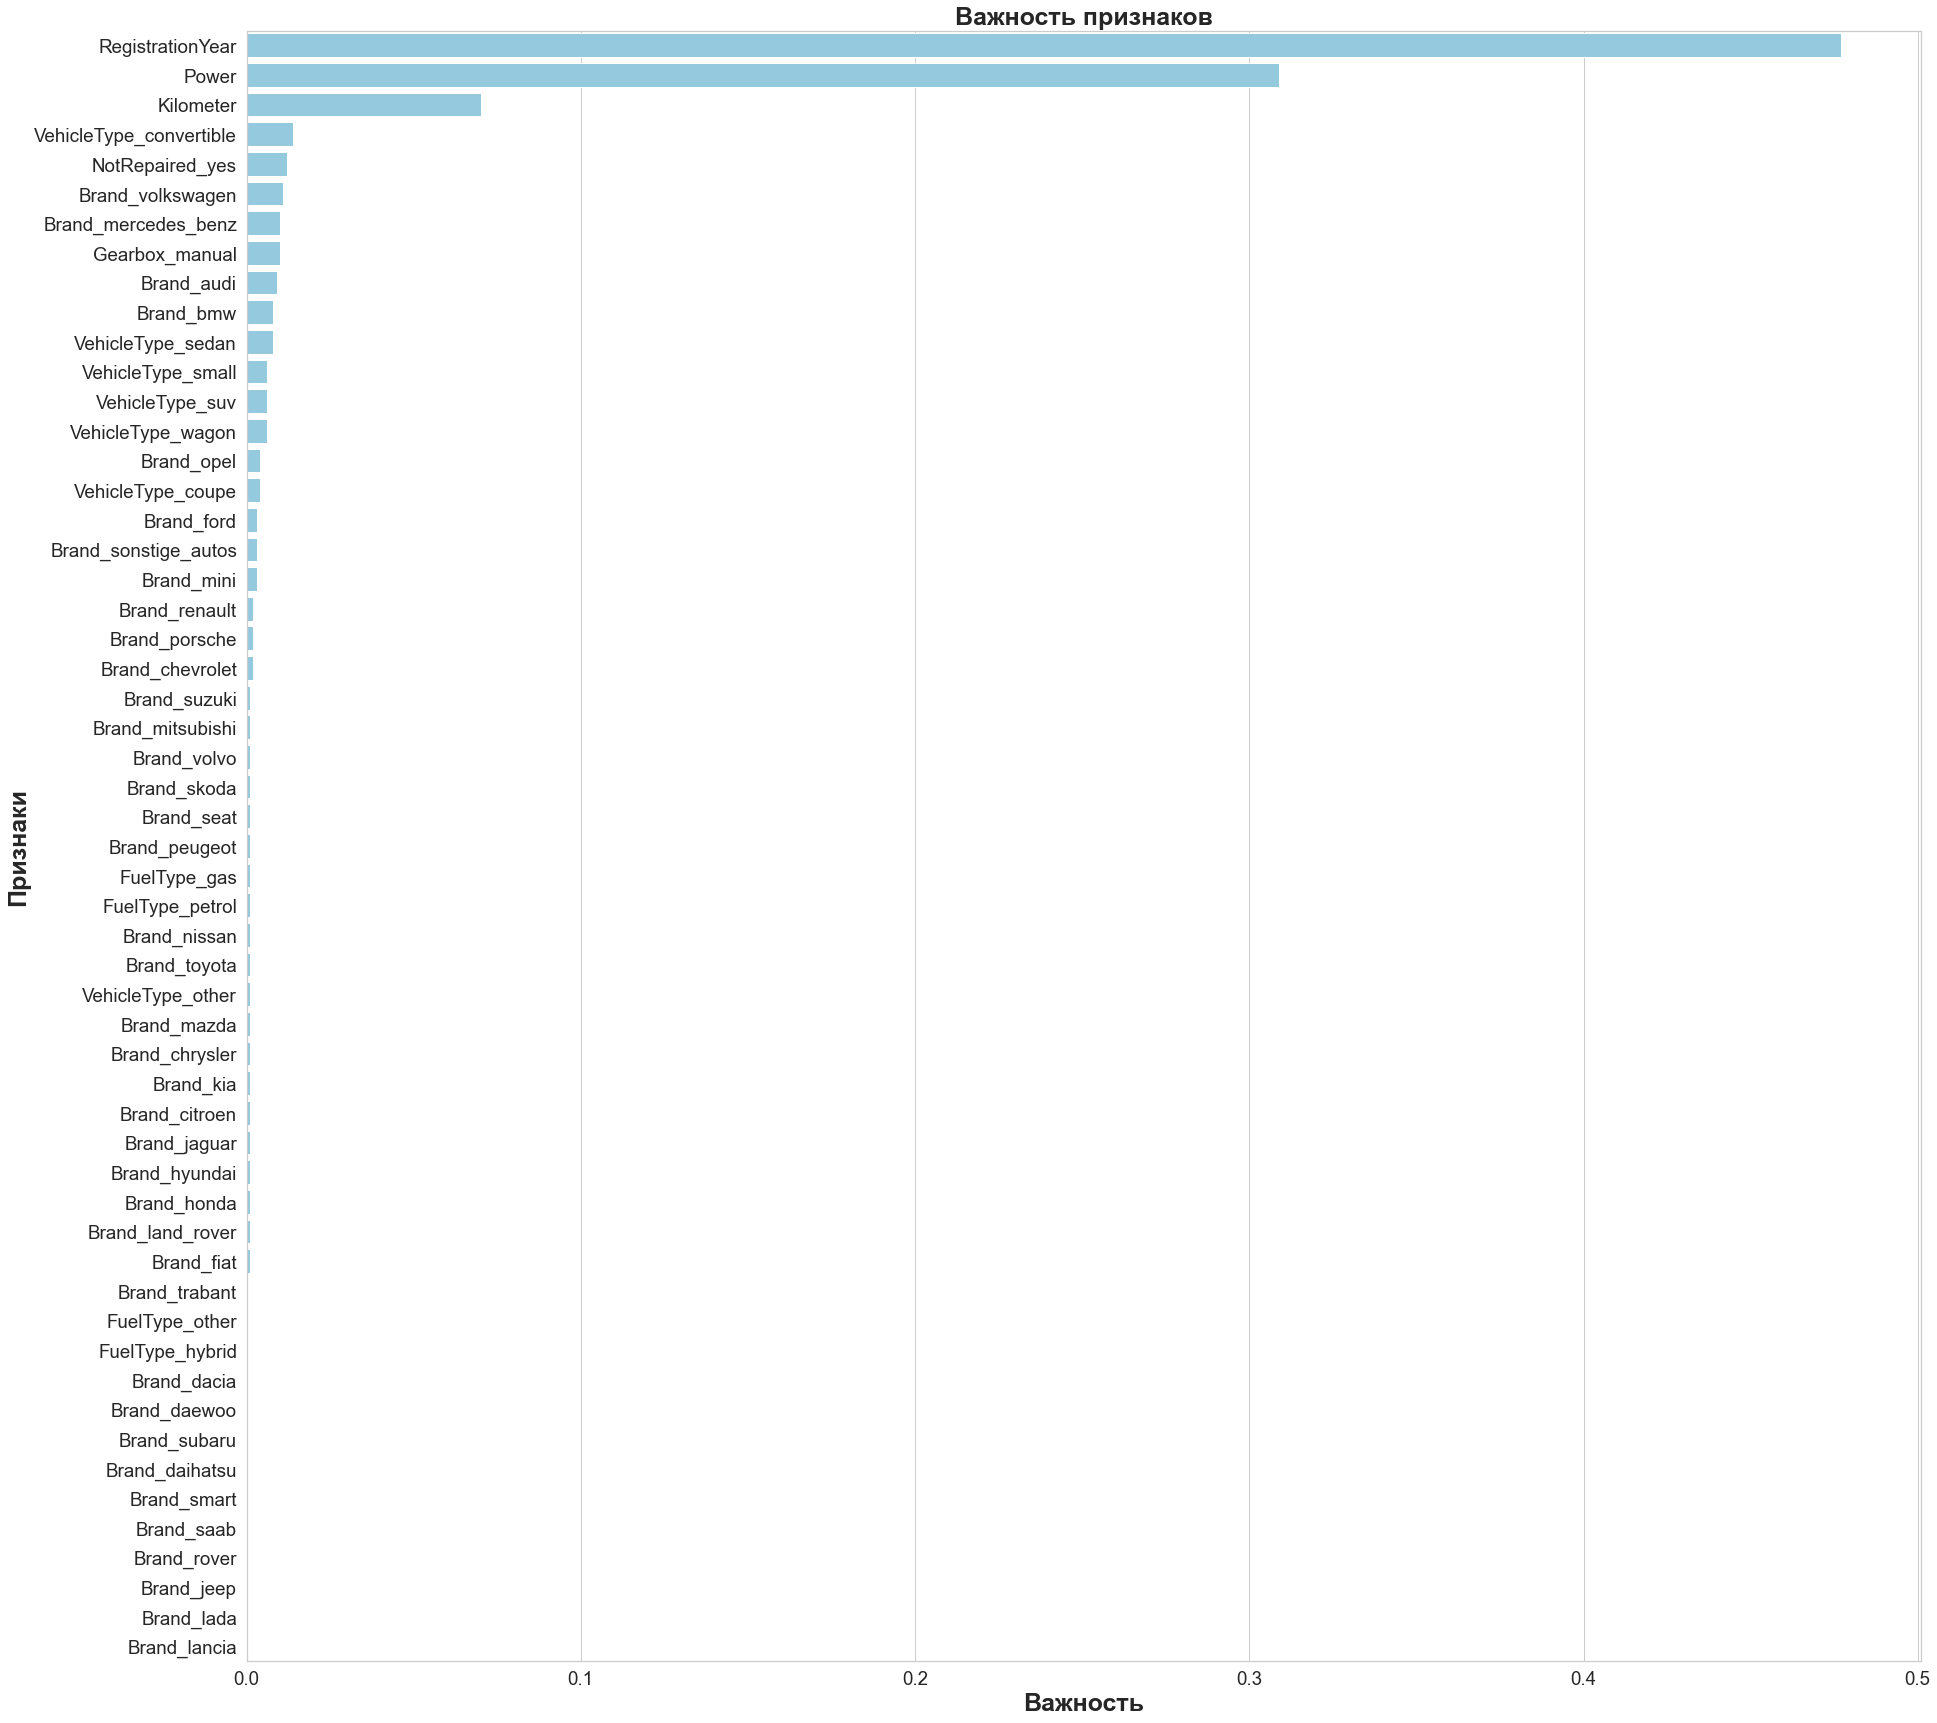

In [66]:
# обучим модель Random Forest
random_forest = RandomForestRegressor()
random_forest.fit(X_train_std, y_train)
# определим важность признаков через атрибут модели feature_importances_
importances = pd.DataFrame({'признаки':features.columns,'важность':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('важность',ascending=False).set_index('признаки')
# выполним визуализацию важности признаков
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,30)
sns.barplot(x=importances['важность'], y=importances.index, data=importances, color='skyblue')
plt.xlabel('Важность', fontsize=25, weight = 'bold')
plt.ylabel('Признаки', fontsize=25, weight = 'bold')
plt.title('Важность признаков', fontsize=25, weight = 'bold')
plt.show()

### Уменьшение размерности пространства признаков
Визуализация важности признаков говорит нам о возможности значительно снизить размерность пространства признаков, за
счет удаления наименее важных признаков.

In [67]:
# удалим наименнее важные признаки
data_importances = data.drop('Brand', axis=1)
# выполним дамми кодирование
data_dammies = pd.get_dummies(data_importances,
                              columns=['VehicleType', 'Gearbox', 'FuelType', 'NotRepaired'],
                              drop_first=True)
# выделим признаки и целевую метку
features = data_dammies.drop('Price', axis=1)
target = data_dammies['Price']
# разделим данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=12345)
print('Размер обучающей выборки', X_train.shape)
print('Размер тестовой выборки', X_test.shape)
# выполним масштабирование данных
sc = StandardScaler()
# вычислим параметры μ (эмпирическое среднее) и σ (стандартное отклонение) для каждой размерности признаков из тренировочных данных
sc.fit(X_train)
# стандартизируем данные, используя для этого расчетные параметры μ и σ.
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Размер обучающей выборки (248058, 16)
Размер тестовой выборки (106311, 16)


### Функция оценки времени выполнения кода

In [68]:
def exec_time(start, end):
    '''
    Функция принимает на вход временные засечки начала и окончания выполнения кода
    :param start:
    :param end:
    Функция возвращает расчетное время выполнения кода в формате ч:м:с
    :return:
    '''
    diff_time = end - start
    m, s = divmod(diff_time, 60)
    h, m = divmod(m, 60)
    s,m,h = int(round(s, 0)), int(round(m, 0)), int(round(h, 0))
    return ("Время выполнения: " + "{0:02d}:{1:02d}:{2:02d}".format(h, m, s))

### Обучение и предсказание
Для обучения и сравнения выберим следующие алгоритмы для моделирования:
   - Простоая линейная модель регрессии со стохастическим градиентным спуском `SGD`
   - Регуляризованная линейная модель гребневой регрессии `Ridge` (L2 регуляризация)
   - Регуляризованная линейная модель лассо регрессии `Lasso` (L1 регуляризация)
   - Регуляризованная линейная модель регрессии эластичная сетка `ElasticNet` (L1,L2 регуляризации)
   - Ансамбль `Random Forest` (мажоритарное голосование)
   - Ансамбль `Light GBM` (градиентный бустинг)
   - Ансамбль `Cat Boost` (градиентный бустинг)
   - Ансамбль `XGB Boost` (градиентный бустинг)

In [69]:
models = [SGDRegressor(),
          RidgeCV(alphas=[.1, 1, 10]),
          LassoCV(alphas=[.1, 1, 10]),
          ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=[.1, 1, 10]),
          RandomForestRegressor(),
          LGBMRegressor(),
          CatBoostRegressor(),
          XGBRegressor()]
pred_train = []
pred_test = []
rmse_train = []
rmse_test = []
times = []

for m in models:
    # секундомер старт
    start = time.time()
    # обучение
    m.fit(X_train_std, y_train)
    # прогноз на тренировочной выборке
    prediction_train = m.predict(X_train_std)
    # прогноз на тестовой выборке
    prediction_test = m.predict(X_test_std)
    # сохранение результатов прогнозирования
    pred_train.append(prediction_train)
    pred_test.append(prediction_test)
    # оценка прогнозирование
    rmse_train.append(round(np.sqrt(mean_squared_error(y_train, prediction_train))))
    rmse_test.append(round(np.sqrt(mean_squared_error(y_test, prediction_test))))
    # секундомер стоп
    end = time.time()
    # сохранение времени обучения и прогнозирования
    times.append(exec_time(start,end))

Learning rate set to 0.097841
0:	learn: 4073.0144257	total: 75.8ms	remaining: 1m 15s
1:	learn: 3850.4816983	total: 146ms	remaining: 1m 13s
2:	learn: 3648.8452439	total: 227ms	remaining: 1m 15s
3:	learn: 3469.2770405	total: 315ms	remaining: 1m 18s
4:	learn: 3307.5593892	total: 398ms	remaining: 1m 19s
5:	learn: 3175.2205618	total: 488ms	remaining: 1m 20s
6:	learn: 3059.5881329	total: 567ms	remaining: 1m 20s
7:	learn: 2955.1323329	total: 639ms	remaining: 1m 19s
8:	learn: 2863.4496837	total: 731ms	remaining: 1m 20s
9:	learn: 2784.8709310	total: 827ms	remaining: 1m 21s
10:	learn: 2712.6749088	total: 910ms	remaining: 1m 21s
11:	learn: 2652.5828537	total: 1s	remaining: 1m 22s
12:	learn: 2599.8880944	total: 1.07s	remaining: 1m 21s
13:	learn: 2553.7251526	total: 1.15s	remaining: 1m 21s
14:	learn: 2512.9500172	total: 1.23s	remaining: 1m 21s
15:	learn: 2477.4496818	total: 1.33s	remaining: 1m 21s
16:	learn: 2445.6957580	total: 1.41s	remaining: 1m 21s
17:	learn: 2418.2585636	total: 1.49s	remaining:

### Выбор оптимизированной модели по алгоритму TPOT Auto ML

In [70]:
start = time.time()
tpot = TPOTRegressor(generations=3, population_size=5, verbosity=2, n_jobs=-1, random_state=12345)
tpot.fit(X_train_std, y_train)
tpot_pred_train = tpot.predict(X_train_std)
tpot_pred_test = tpot.predict(X_test_std)
tpot_rmse_train = round(np.sqrt(mean_squared_error(y_train, tpot_pred_train)))
tpot_rmse_test = round(np.sqrt(mean_squared_error(y_test, tpot_pred_test)))
end = time.time()
tpot_time = exec_time(start,end)

Optimization Progress:   0%|          | 0/20 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -4403139.799023183

Generation 2 - Current best internal CV score: -4403139.799023183

Generation 3 - Current best internal CV score: -4403139.799023183

Best pipeline: XGBRegressor(StandardScaler(input_matrix), learning_rate=1.0, max_depth=4, min_child_weight=16, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.55, verbosity=0)


## Анализ моделей

In [71]:
comparison_table = pd.DataFrame({
    'Model': ['SGDRegressor', 'RidgeCV', 'LassoCV', 'ElasticNetCV', 'RandomForestRegressor',
          'LGBMRegressor', 'CatBoostRegressor', 'XGBRegressor', 'TPOTRegressor AutoML'],
    'RMSE train': [rmse_train[0], rmse_train[1], rmse_train[2], rmse_train[3],
                   rmse_train[4], rmse_train[5], rmse_train[6], rmse_train[7], tpot_rmse_train],
    'RMSE test': [rmse_test[0], rmse_test[1], rmse_test[2], rmse_test[3], rmse_test[4],
                  rmse_test[5], rmse_test[6], rmse_test[7], tpot_rmse_test],
    'Execution Time': [times[0], times[1], times[2], times[3], times[4], times[5], times[6], times[7], tpot_time]})

display(comparison_table)

,Model,RMSE train,RMSE test,Execution Time
0,SGDRegressor,3155,3131,Время выполнения: 00:00:02
1,RidgeCV,3151,3130,Время выполнения: 00:00:01
2,LassoCV,3151,3130,Время выполнения: 00:00:15
3,ElasticNetCV,3151,3130,Время выполнения: 00:00:23
4,RandomForestRegressor,1606,2009,Время выполнения: 00:03:44
5,LGBMRegressor,2033,2052,Время выполнения: 00:00:13
6,CatBoostRegressor,1961,2001,Время выполнения: 00:01:12
7,XGBRegressor,1933,2000,Время выполнения: 00:00:23
8,TPOTRegressor AutoML,2052,2084,Время выполнения: 00:23:39


## Вывод
Исходя из целевой задачи заказчика - предложить модель для предсказания стоимости автомобиля с качеством
предсказания, не превышающим порог значения RMSE = 2500 и максимально возможной скоростью предстказания, можно
предложить, на мой взгляд, оптимальную модель по соотношению качество/скорость - **LGBMRegressor**.
В ходе сравнительного обучения и предсказания различных моделей можно выделить следующие особенности:
   1. Приемлемое качество предсказания показали все ансамбли моделей.
   2. Лучшее качество предсказания на тестовой выборке показали модели:  `CatBoostRegressor`, `XGBRegressor`, однако
     `CatBoost` уступает в скорости выполнения кода.
   3. Модель `Random Forest` показала приемлемое качество обучения, однако является аутсайдером по времени выполнения
    кода среди всех тестируемых моделей.
   4. Модель `Random Forest` имеет значительное расхождение между качеством предсказания на тренировочной и тестовой
    выборках, что говорит о переобучении модели
   5. Алгоритм автоматического ML TPOT предложил оптимизированную модель XGBRegressor со следующими
     параметрами `(learning_rate=1.0, max_depth=4, min_child_weight=16, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.55, verbosity=0)`
   6. Модель `TPOT` показала приемлемое качество предсказания, затратив на оптимизацию и предсказание 23 минуты. На
   фоне тестируемиых ансамблей модель auto ML находится в хвосте. Хотя надо учесть, что качество модели в алгоритме
   TPOT растет с увеличением параметра `generations`
   7. Модель линейной регрессии со стохастическим градиентным спуском и регуляризованные линейные модели требования
   покачеству предсказания не достигли.